<a href="https://www.kaggle.com/code/kapturovalexander/kapturov-s-solution-of-ps-s4e3?scriptVersionId=165526955" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <span style="border: 3px solid green; border-radius: 30px; color: white; background-image: url(https://www.kaggle.com/competitions/68699/images/header); padding: 1px 5px 5px 5px">Steel Plate Defect Prediction</span>

![](https://cdn.thepipingmart.com/wp-content/uploads/2022/12/Defects-that-could-occur-during-the-cold-rolling-process-1.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv
/kaggle/input/steel-plates-faults-from-uci/Steel Plates Faults.csv
/kaggle/input/steel-plates-faults-from-uci/Faults27x7_var
/kaggle/input/steel-plates-faults-from-uci/Faults.NNA


![](https://www.kaggle.com/competitions/68699/images/header)

# <span style="background-image: url(https://www.kaggle.com/competitions/68699/images/header); color: white; font-size: 50px;">Table of Contents</span>

1. [Import libraries](#1)
2. [Open data files](#2)
3. [Show first 5 lines of train data](#3)
    - 3.1 [Compare original train and competition train](#3.1)
    - 3.2 [Concatenate original train with competition train](#3.2)
4. [Shapes of train and test data](#4)
5. [Display descriptive statistics of train data](#5)
6. [Check the number of gaps for each feature](#6)
7. [Feature Engineering](#7)
    - 7.1 [Figure out how much duplicates in data](#7.1)
    - 7.2 [Remove duplicates from data](#7.2)
    - 7.3 [One-hot encoding](#7.3)
    - 7.4 [More plots](#7.4)
8. [Display histograms of distribution](#8)
9. [Let's count target of train data](#9)
10. [Transform the data with log1p](#10)
    - 10.1 [Pie plot of target](#10.1)
    - 10.2 [Feature importance](#10.2)
11. [Build a heat map of correlations](#11)
12. [Define base models with tuned hyperparameters](#12)
13. [Defining the meta-model with tuned hyperparameters](#13)
14. [Creating and fitting the stacking model](#14)
15. [Predict validation set and calculate accuracy score](#15)
16. [Predict the test data](#16)
17. [Build DataFrame and make submission](#17)
18. [Save the model into pickle file](#18)

### <p style="color: #3cb371; border-style: solid; border-color: yellow; padding: 5px 5px 5px 5px; border-width: 5px;">Submissions are evaluated using area under the ROC curve using the predicted probabilities and the ground truth targets. To calculate the final score, AUC is calculated for each of the 7 defect categories and then averaged. In other words, the score is the average of the individual AUC of each predicted column.s</p>

## <span style="color: #3cb371; border-style: solid; padding: 5px 5px 5px 5px; border-width: 5px;">Features:</span>

1. **X_Minimum**: The minimum x-coordinate of the bounding box of the defect.
2. **X_Maximum**: The maximum x-coordinate of the bounding box of the defect.
3. **Y_Minimum**: The minimum y-coordinate of the bounding box of the defect.
4. **Y_Maximum**: The maximum y-coordinate of the bounding box of the defect.
5. **Pixels_Areas**: The total number of pixels in the defect area.
6. **X_Perimeter**: The perimeter of the defect in the x-direction.
7. **Y_Perimeter**: The perimeter of the defect in the y-direction.
8. **Sum_of_Luminosity**: The sum of luminosity values in the defect area.
9. **Minimum_of_Luminosity**: The minimum luminosity value in the defect area.
10. **Maximum_of_Luminosity**: The maximum luminosity value in the defect area.
11. **Length_of_Conveyer**: The length of the conveyer where the defect was detected.
12. **TypeOfSteel_A300**: Binary indicator for type of steel A300.
13. **TypeOfSteel_A400**: Binary indicator for type of steel A400.
14. **Steel_Plate_Thickness**: Thickness of the steel plate.
15. **Edges_Index**: Index indicating the ratio of the total length of edges to the perimeter.
16. **Empty_Index**: Index indicating the ratio of empty spaces to the defect area.
17. **Square_Index**: Index indicating the ratio of the square of perimeter to the defect area.
18. **Outside_X_Index**: Index indicating the ratio of the number of exterior contours to the defect area in the x-direction.
19. **Edges_X_Index**: Index indicating the ratio of the number of edges in the x-direction to the defect area.
20. **Edges_Y_Index**: Index indicating the ratio of the number of edges in the y-direction to the defect area.
21. **Outside_Global_Index**: Index indicating the ratio of the number of exterior contours to the defect area globally.
22. **LogOfAreas**: The logarithm of the defect area.
23. **Log_X_Index**: Index indicating the ratio of the logarithm of the defect area to the defect length in the x-direction.
24. **Log_Y_Index**: Index indicating the ratio of the logarithm of the defect area to the defect length in the y-direction.
25. **Orientation_Index**: Index indicating the orientation of the defect.
26. **Luminosity_Index**: Index indicating the luminosity of the defect.
27. **SigmoidOfAreas**: Sigmoid transformation of the defect area.
28. **Pastry**: Binary indicator for the presence of a pastry defect.
29. **Z_Scratch**: Binary indicator for the presence of a Z scratch defect.
30. **K_Scatch**: Binary indicator for the presence of a K scratch defect.
31. **Stains**: Binary indicator for the presence of stains.
32. **Dirtiness**: Binary indicator for the presence of dirtiness.
33. **Bumps**: Binary indicator for the presence of bumps.
34. **Other_Faults**: Binary indicator for the presence of other faults.

![](https://www.ismt.co.in/documents/1389466/1408560/ismt+home+banner+_cropped2.jpg/5c06adcb-583e-01da-208b-2446d98a267a?t=1670315199709)

### Feature's explaination by [Luca Massaron](https://www.kaggle.com/lucamassaron) in [his notebook](https://www.kaggle.com/code/lucamassaron/steel-plate-eda-xgboost-is-all-you-need)
**<span style="color: #3cb371;">Pastry</span>**: Pastry refers to small patches or irregularities on the surface of the steel plate, typically caused by imperfections in the manufacturing process or handling during transport. These imperfections can affect the surface smoothness and appearance of the steel plate.

**<span style="color: #3cb371;">Z_Scratch</span>**: Z-scratches are narrow scratches or marks on the surface of the steel plate that run parallel to the rolling direction. These scratches can be caused by various factors such as handling, machining, or contact with abrasive materials during production or transportation.

**<span style="color: #3cb371;">K_Scratch</span>**: K-scratches are similar to Z-scratches but run perpendicular to the rolling direction. They can also be caused by handling, machining, or contact with abrasive materials during manufacturing or transportation processes.

**<span style="color: #3cb371;">Stains</span>**: Stains refer to discolored or contaminated areas on the surface of the steel plate. These stains can result from various sources such as rust, oil, grease, or other foreign substances that come into contact with the steel surface during processing, storage, or handling.

**<span style="color: #3cb371;">Dirtiness</span>**: Dirtiness indicates the presence of dirt or particulate matter on the surface of the steel plate. This can include various types of debris or contaminants that accumulate during manufacturing, handling, or storage processes.

**<span style="color: #3cb371;">Bumps</span>**: Bumps are raised or protruding areas on the surface of the steel plate. These can be caused by irregularities in the manufacturing process, such as uneven rolling or cooling, or by physical damage during handling or transportation.

**<span style="color: #3cb371;">Other_Faults</span>**: This category likely encompasses a broader range of faults or defects not specifically categorized in the other fault types listed. It could include various types of surface imperfections, irregularities, or abnormalities that affect the quality or usability of the steel plate.

<a id='1'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">⚠️ 1 - Import libraries</span>

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from optuna.samplers import TPESampler
import pickle
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

<a id='2'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">⚙️ 2 - Open data files</span>

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e3/sample_submission.csv')

<a id='3'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🔩 3 - Show first 5 lines of train data</span>

In [4]:
# Show all properties on display and set style
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
warnings.simplefilter("ignore")

train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [5]:
features = list(train.columns[1:])
original_train = pd.read_csv('/kaggle/input/steel-plates-faults-from-uci/Faults.NNA', sep='\t', names=features)

# Save original data in .csv format
original_train.to_csv('Steel Plates Faults.csv', index=False)
print(original_train.shape)
original_train.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


<a id='3.1'></a>
### <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">3.1 Compare original train and competition train

In [6]:
print(original_train.shape)
original_train.columns.tolist()

(1941, 34)


['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

In [7]:
print(train.shape)
train.columns.tolist()

(19219, 35)


['id',
 'X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

### We have to drop 'id' from train and test dataset

In [8]:
submission_id = test.id

train.drop(columns='id', axis=1, inplace=True)
test.drop(columns='id', axis=1, inplace=True)

<a id='3.2'></a>
### <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">3.2 Concatenate original train with competition train

In [9]:
train = pd.concat(objs=[train, original_train])
train.shape

(21160, 34)

### Now You can see that train data became +1941 objectives bigger than previous data

<a id='4'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🛠️ 4 - Shapes of train and test data</span>

In [10]:
print(f'Train data: {train.shape}')
print(f'Test data: {test.shape}\n')

train_data_percentage = np.round(train.shape[0] / (train.shape[0] + test.shape[0]), 4)
print(f'Train data consists of {train_data_percentage * 100}% of all observations')
print(f'Test data consists of {(1 - train_data_percentage) * 100}% of all observations')

Train data: (21160, 34)
Test data: (12814, 27)

Train data consists of 62.28% of all observations
Test data consists of 37.72% of all observations


<a id='5'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🗜️ 5 - Display descriptive statistics of train data</span>

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,21160.0,6.971301e+02,5.320546e+02,0.0000,50.0000,7.540000e+02,1.145000e+03,1.705000e+03
X_Maximum,21160.0,7.413922e+02,5.011601e+02,4.0000,214.0000,7.720000e+02,1.161000e+03,1.713000e+03
Y_Minimum,21160.0,1.831495e+06,1.892922e+06,6712.0000,639490.0000,1.378585e+06,2.339627e+06,1.298766e+07
Y_Maximum,21160.0,1.828639e+06,1.886266e+06,6724.0000,639507.0000,1.378261e+06,2.336466e+06,1.298769e+07
Pixels_Areas,21160.0,1.703241e+03,3.884801e+03,2.0000,88.0000,1.690000e+02,6.590000e+02,1.526550e+05
X_Perimeter,21160.0,9.714074e+01,1.925100e+02,2.0000,15.0000,2.500000e+01,6.700000e+01,1.044900e+04
Y_Perimeter,21160.0,6.585246e+01,1.611876e+02,1.0000,14.0000,2.400000e+01,6.200000e+01,1.815200e+04
Sum_of_Luminosity,21160.0,1.931736e+05,4.489348e+05,250.0000,9778.0000,1.840200e+04,6.841600e+04,1.159141e+07
Minimum_of_Luminosity,21160.0,8.478459e+01,2.912134e+01,0.0000,68.0000,9.000000e+01,1.050000e+02,2.030000e+02
Maximum_of_Luminosity,21160.0,1.287892e+02,1.467294e+01,37.0000,124.0000,1.270000e+02,1.350000e+02,2.530000e+02


In [12]:
contains_inf = train.isin([np.inf, -np.inf]).any().any()
contains_inf

False

### There is no any inf values

![](https://www.researchgate.net/publication/312250518/figure/fig1/AS:613388791062528@1523254692990/Major-defect-types-found-on-as-cast-semi-processed-steel-slab.png)

<a id='6'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🔨 6 - Check the number of gaps for each feature</span>

In [13]:
print('TRAIN data\n')
print(f'{train.isna().sum()}\n\n\n')

print('TEST data\n')
print(test.isna().sum())

TRAIN data

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64



TEST data

X_Minimum                0
X_Maximum       

### There is no any gaps in values

![](https://media.sciencephoto.com/f0/21/11/15/f0211115-800px-wm.jpg)

<a id='7'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">⛏️ 7 - Feature Engineering</span>

### Here will be new features soon!

<a id='7.1'></a>
### <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">7.1 Figure out how much duplicates in data

In [14]:
train_duplicates_number = train[train.duplicated()]
test_duplicates_number = test[test.duplicated()]
                             
print(len(train_duplicates_number))
print(len(test_duplicates_number))

0
0


### There is no duplicates, but if in Your additional data will be then run code below

<a id="7.2"></a>
### <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">7.2 Remove duplicates from data

In [15]:
train = train.drop_duplicates()

# Check whether all duplicates were removed
train_duplicates = train[train.duplicated()]
print(len(train_duplicates))

0


### As we see now there is no more duplicates!

<a id="7.3"></a>
### <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">7.3 One-hot encoding

In [16]:
# Split the train data into X and y
X = train.drop(['Pastry',
  'Z_Scratch',
  'K_Scatch',
  'Stains',
  'Dirtiness',
  'Bumps',
  'Other_Faults'
], axis=1)

X = pd.get_dummies(X, drop_first=True, dtype=int)
test = pd.get_dummies(test, drop_first=True, dtype=int)

X.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998


In [17]:
y = train[['Pastry',
  'Z_Scratch',
  'K_Scatch',
  'Stains',
  'Dirtiness',
  'Bumps',
  'Other_Faults'
]]

y.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21160 entries, 0 to 1940
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              21160 non-null  int64  
 1   X_Maximum              21160 non-null  int64  
 2   Y_Minimum              21160 non-null  int64  
 3   Y_Maximum              21160 non-null  int64  
 4   Pixels_Areas           21160 non-null  int64  
 5   X_Perimeter            21160 non-null  int64  
 6   Y_Perimeter            21160 non-null  int64  
 7   Sum_of_Luminosity      21160 non-null  int64  
 8   Minimum_of_Luminosity  21160 non-null  int64  
 9   Maximum_of_Luminosity  21160 non-null  int64  
 10  Length_of_Conveyer     21160 non-null  int64  
 11  TypeOfSteel_A300       21160 non-null  int64  
 12  TypeOfSteel_A400       21160 non-null  int64  
 13  Steel_Plate_Thickness  21160 non-null  int64  
 14  Edges_Index            21160 non-null  float64
 15  Empty_In

### All features are continuous (int and float)

<a id="7.4"></a>
### <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">7.4 More plots

In [19]:
continuous_features = train.columns.tolist()
continuous_features

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

<a id='8'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">⚒️ 8 - Display histograms of distribution</span>

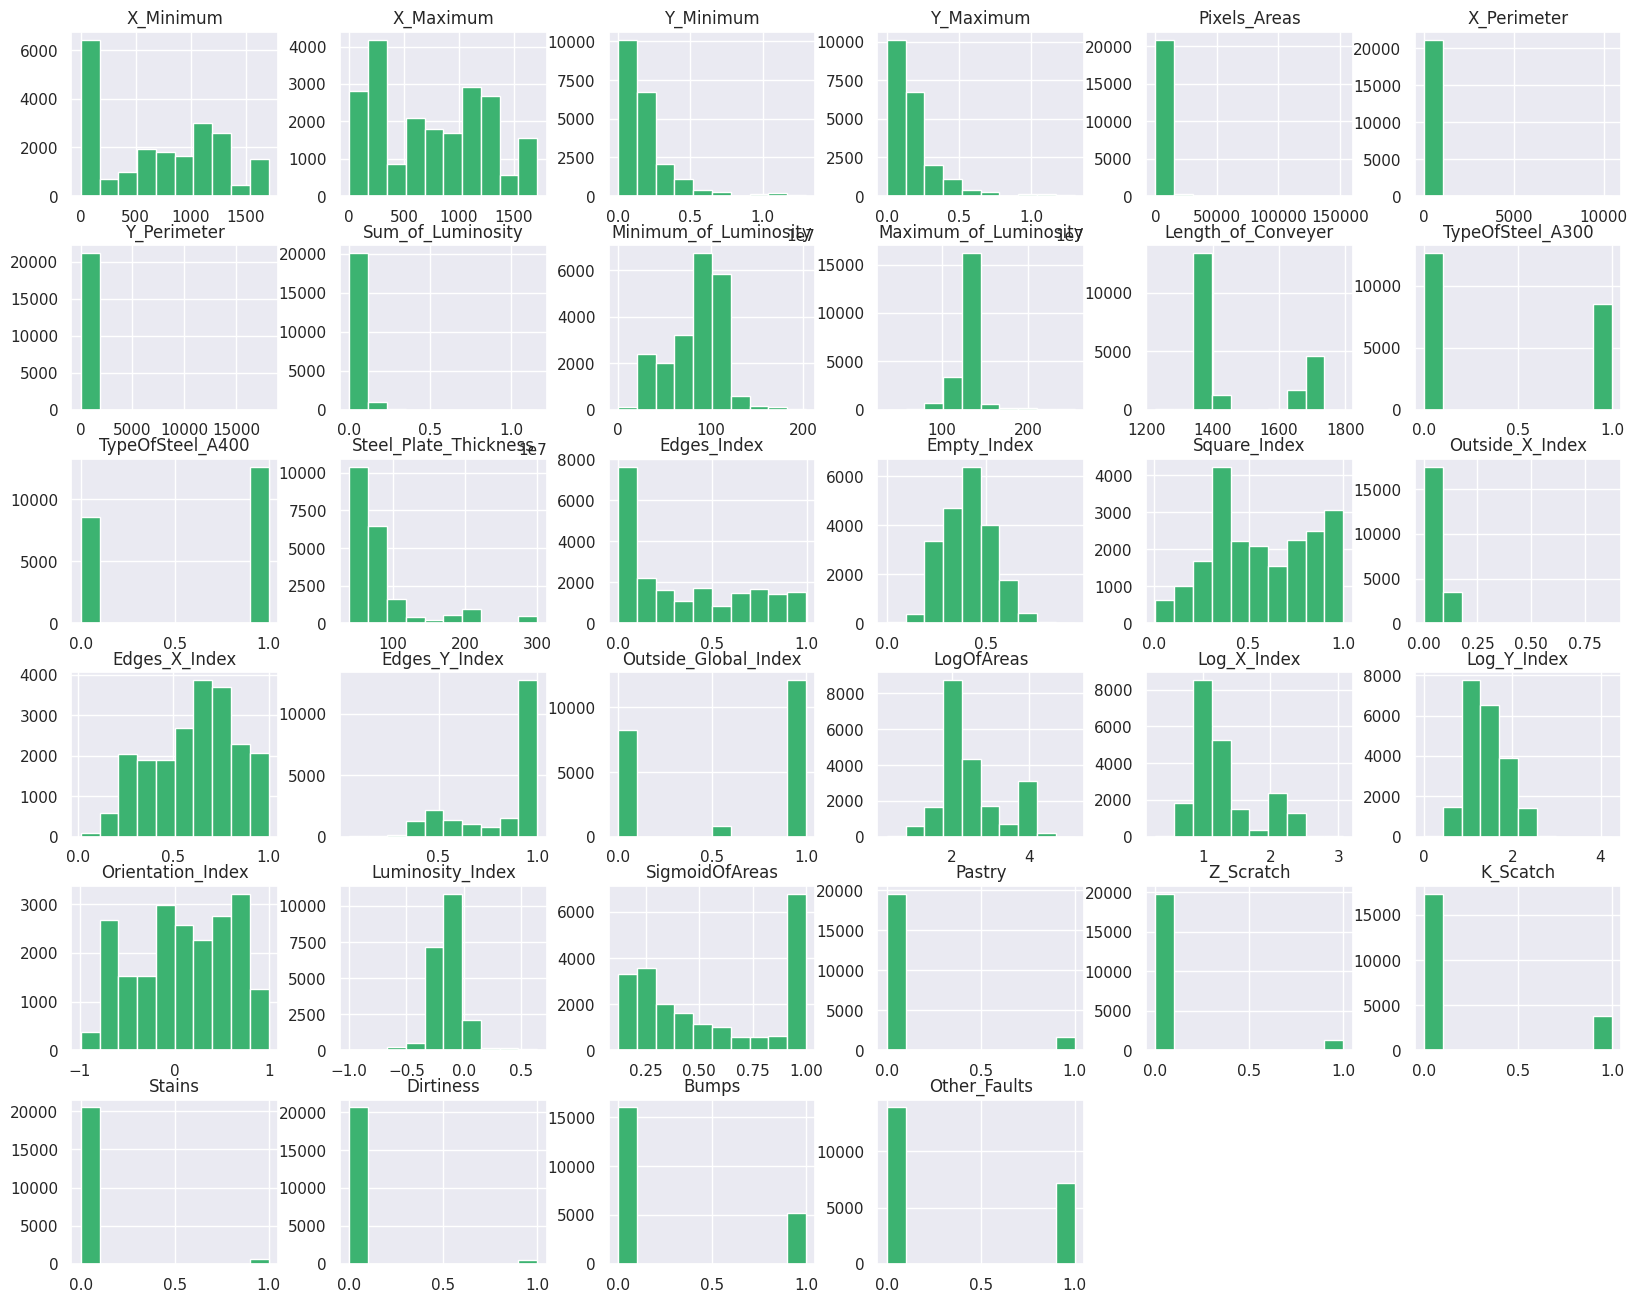

In [20]:
sns.set(rc={'figure.figsize': (20, 16)})
train.hist(color='#3cb371');

<a id='9'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🪛 9 - Let's count target of train data</span>

In [21]:
y.tail()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1
1940,0,0,0,0,0,0,1


<a id='10'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">⛓️ 10 - Transform the data with log1p</span>

### In version 15 I will try to avoid transformation. Let's take a look at results

In [22]:
# for column in X.columns.tolist():
#     X[column] = X[column].apply(lambda x: np.log1p(x))
    
# # Transform test data
# for column in test.columns.tolist():
#     test[column] = test[column].apply(lambda x: np.log1p(x))
    
# X.hist(color='#4e6d54');

![](https://www.timacho.com/wp-content/uploads/2019/03/blog-3.jpg)

<a id='10.2'></a>
### <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">10.2 Feature importance

In [23]:
X.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

CPU times: user 14.6 s, sys: 166 ms, total: 14.7 s
Wall time: 14.5 s


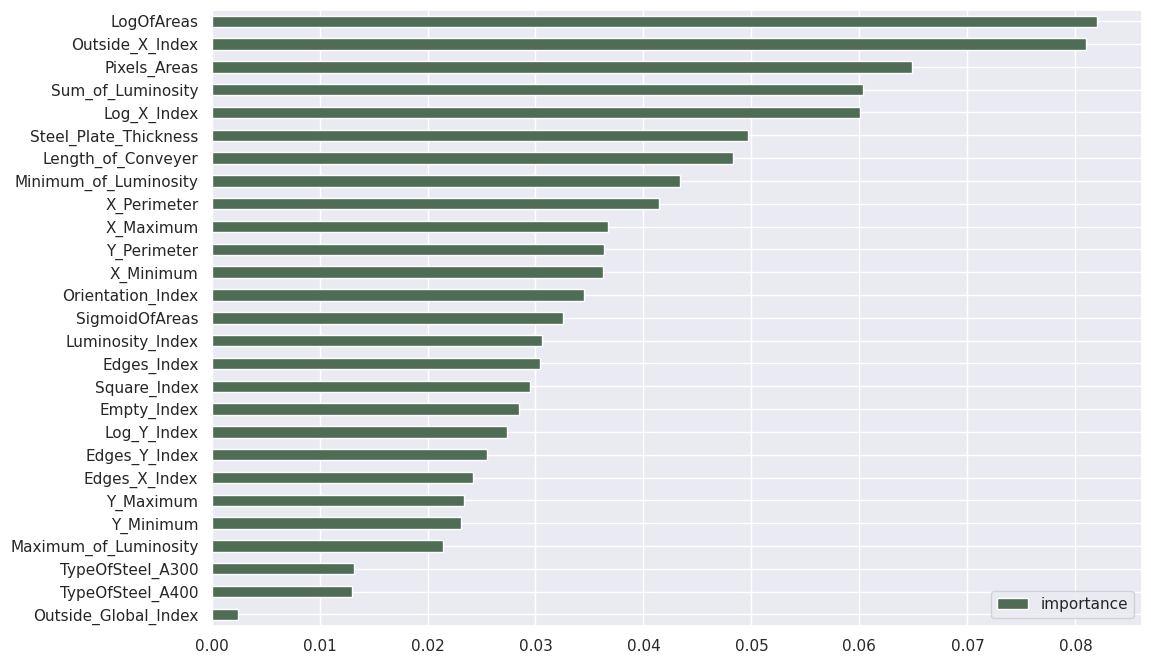

In [24]:
%%time
best_rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=2,
    max_depth=15,
    min_samples_split=2,
    random_state=27,  
)
    
best_rf.fit(X, y)
importance = best_rf.feature_importances_
feature_importance = pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
    .sort_values(ascending=True, by='importance')
feature_importance.plot(kind='barh', figsize=(12, 8), color='#4e6d54');

## <span style="background-image: url(https://www.kaggle.com/competitions/68699/images/header); color: white; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">SHAP for Feature importance

In [25]:
# !pip install shap

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
# rf_clf = RandomForestClassifier()
# rf_clf.fit(X_train, y_train)

# # Make prediction on the testing data
# y_pred = rf_clf.predict(X_test)

# # Classification Report
# print(classification_report(y_pred, y_test))

In [27]:
# %%time
# import shap

# explainer = shap.Explainer(rf_clf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)

"""
CPU times: user 44min 48s, sys: 13.2 s, total: 45min 1s
Wall time: 44min 32s
"""

'\nCPU times: user 44min 48s, sys: 13.2 s, total: 45min 1s\nWall time: 44min 32s\n'

In [28]:
# shap.summary_plot(shap_values[0], X_test)

In [29]:
# shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

In [30]:
# shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

In [31]:
X.columns.tolist()

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [32]:
y.columns.tolist()

['Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

<a id='11'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🧰 11 - Build a heat map of correlations</span>

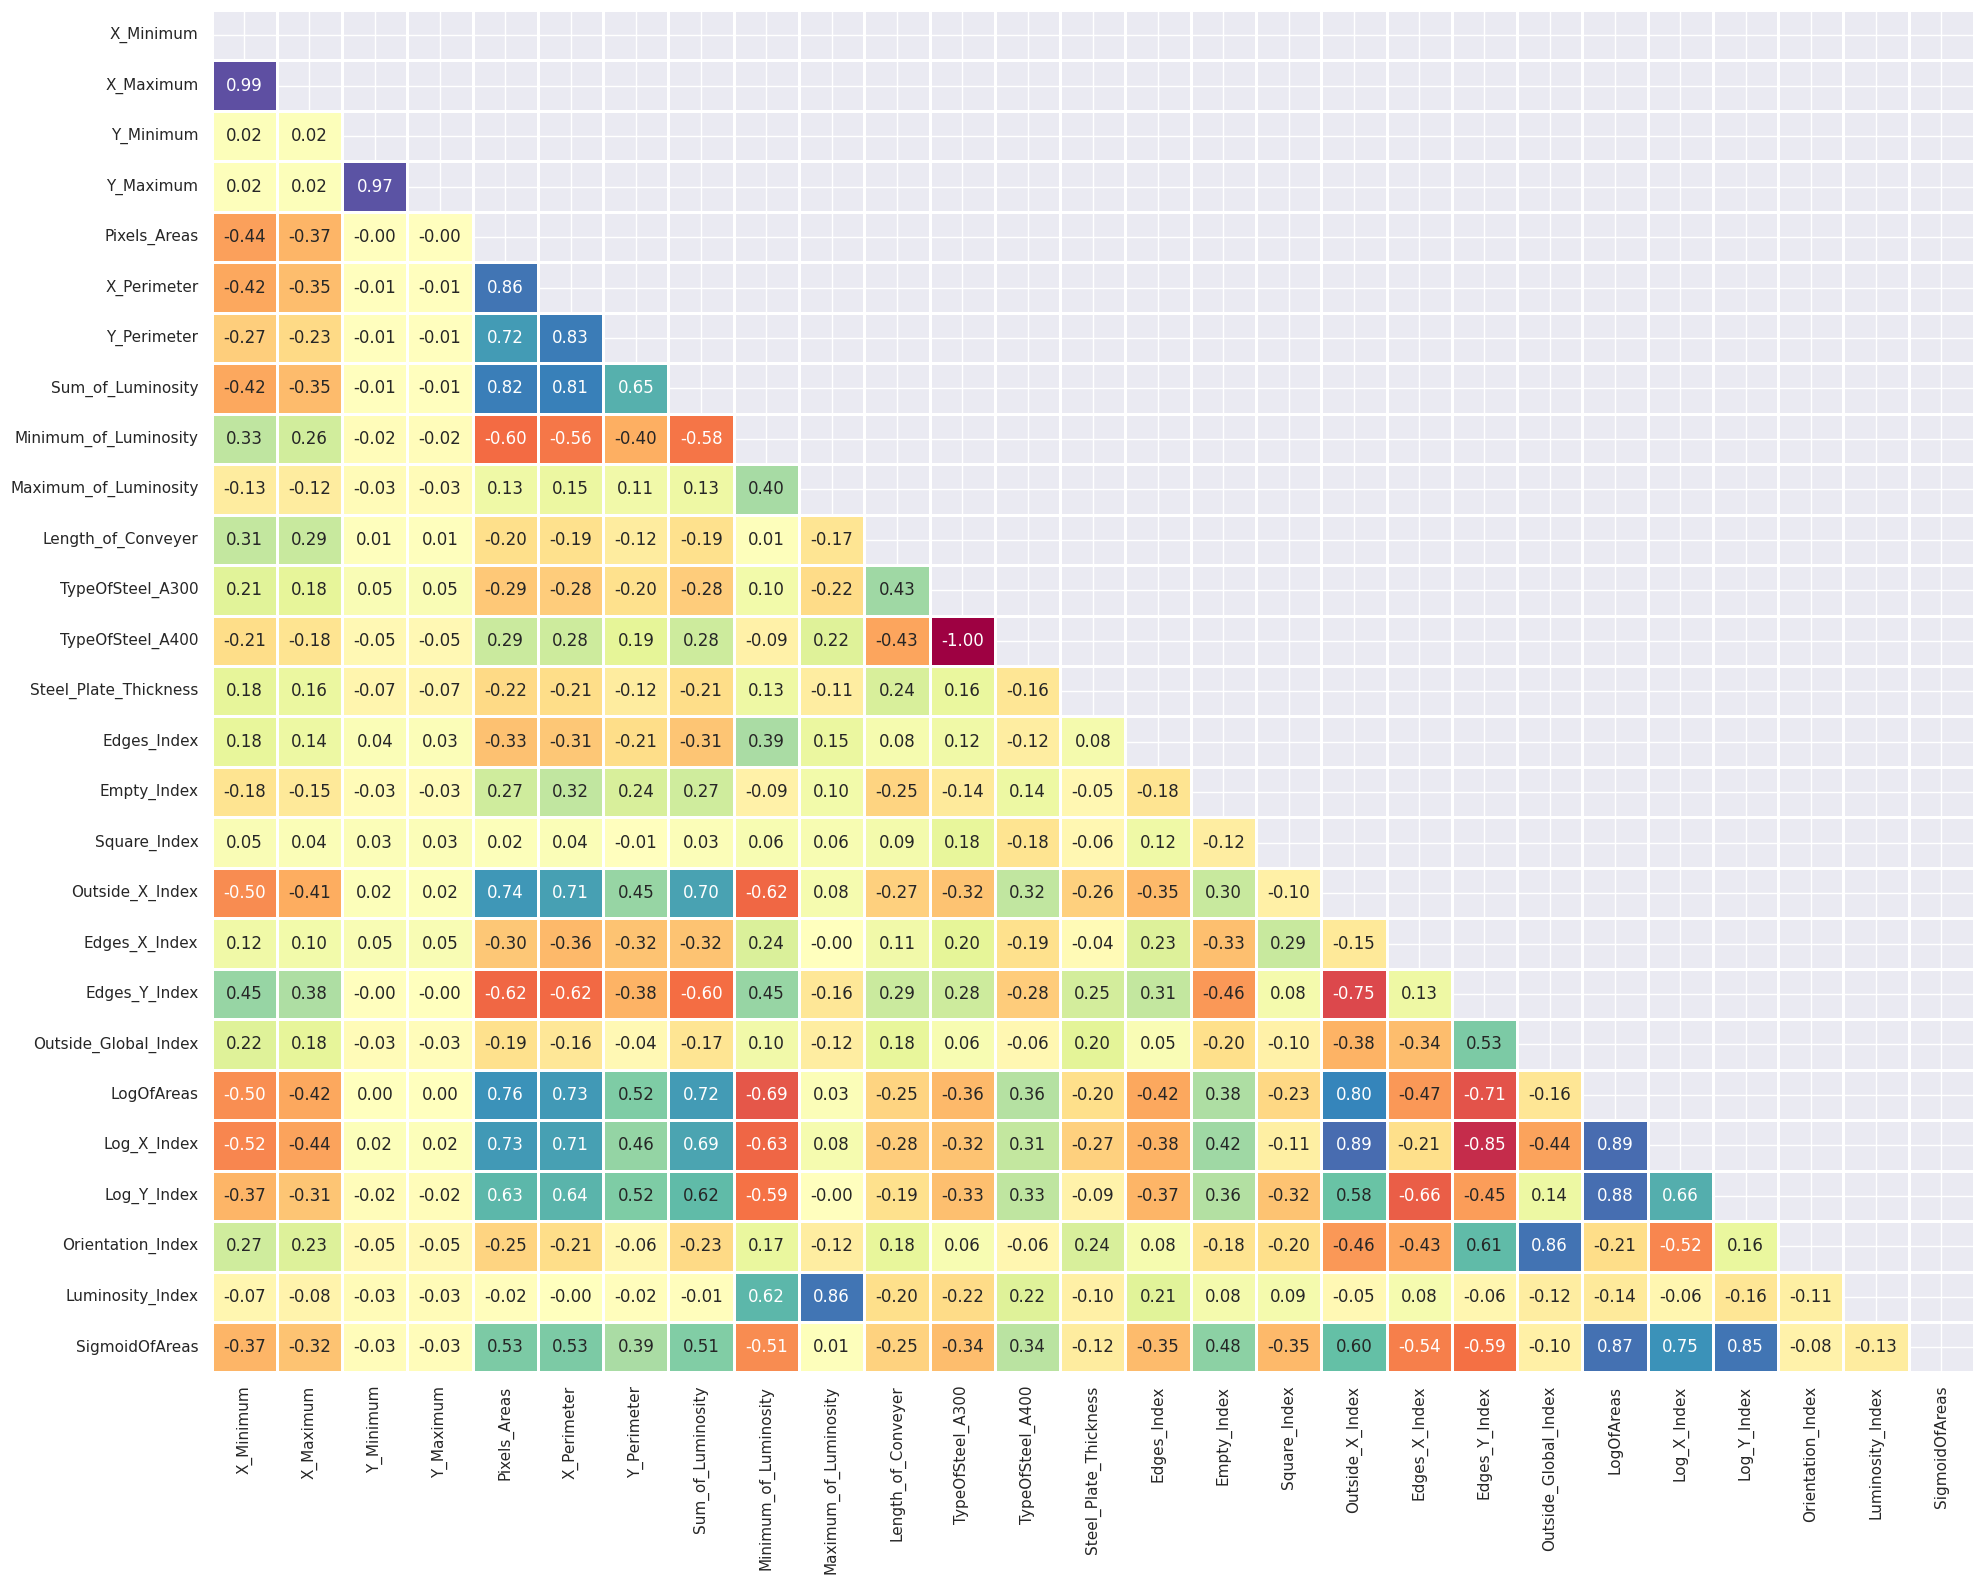

In [33]:
 # Training dataset
numeric_columns_train = X.select_dtypes(include=np.number)
corr_train = numeric_columns_train.corr(method='pearson')
mask_train = np.triu(np.ones_like(corr_train))
sns.heatmap(corr_train, annot=True, fmt='.2f', mask=mask_train, cmap='Spectral', cbar=None, linewidth=2)
plt.tight_layout()
plt.show()

### I will do something is strong-correlated features soon! I will drop features with strong multicorrelation and without influence on target

In [34]:
to_drop = [
    'X_Minimum', 
    'Y_Minimum', 
    'X_Perimeter', 
    'TypeOfSteel_A400', 
    'Log_X_Index', 
    'Log_Y_Index', 
    'Orientation_Index', 
    'SigmoidOfAreas',
    'Maximum_of_Luminosity'
]

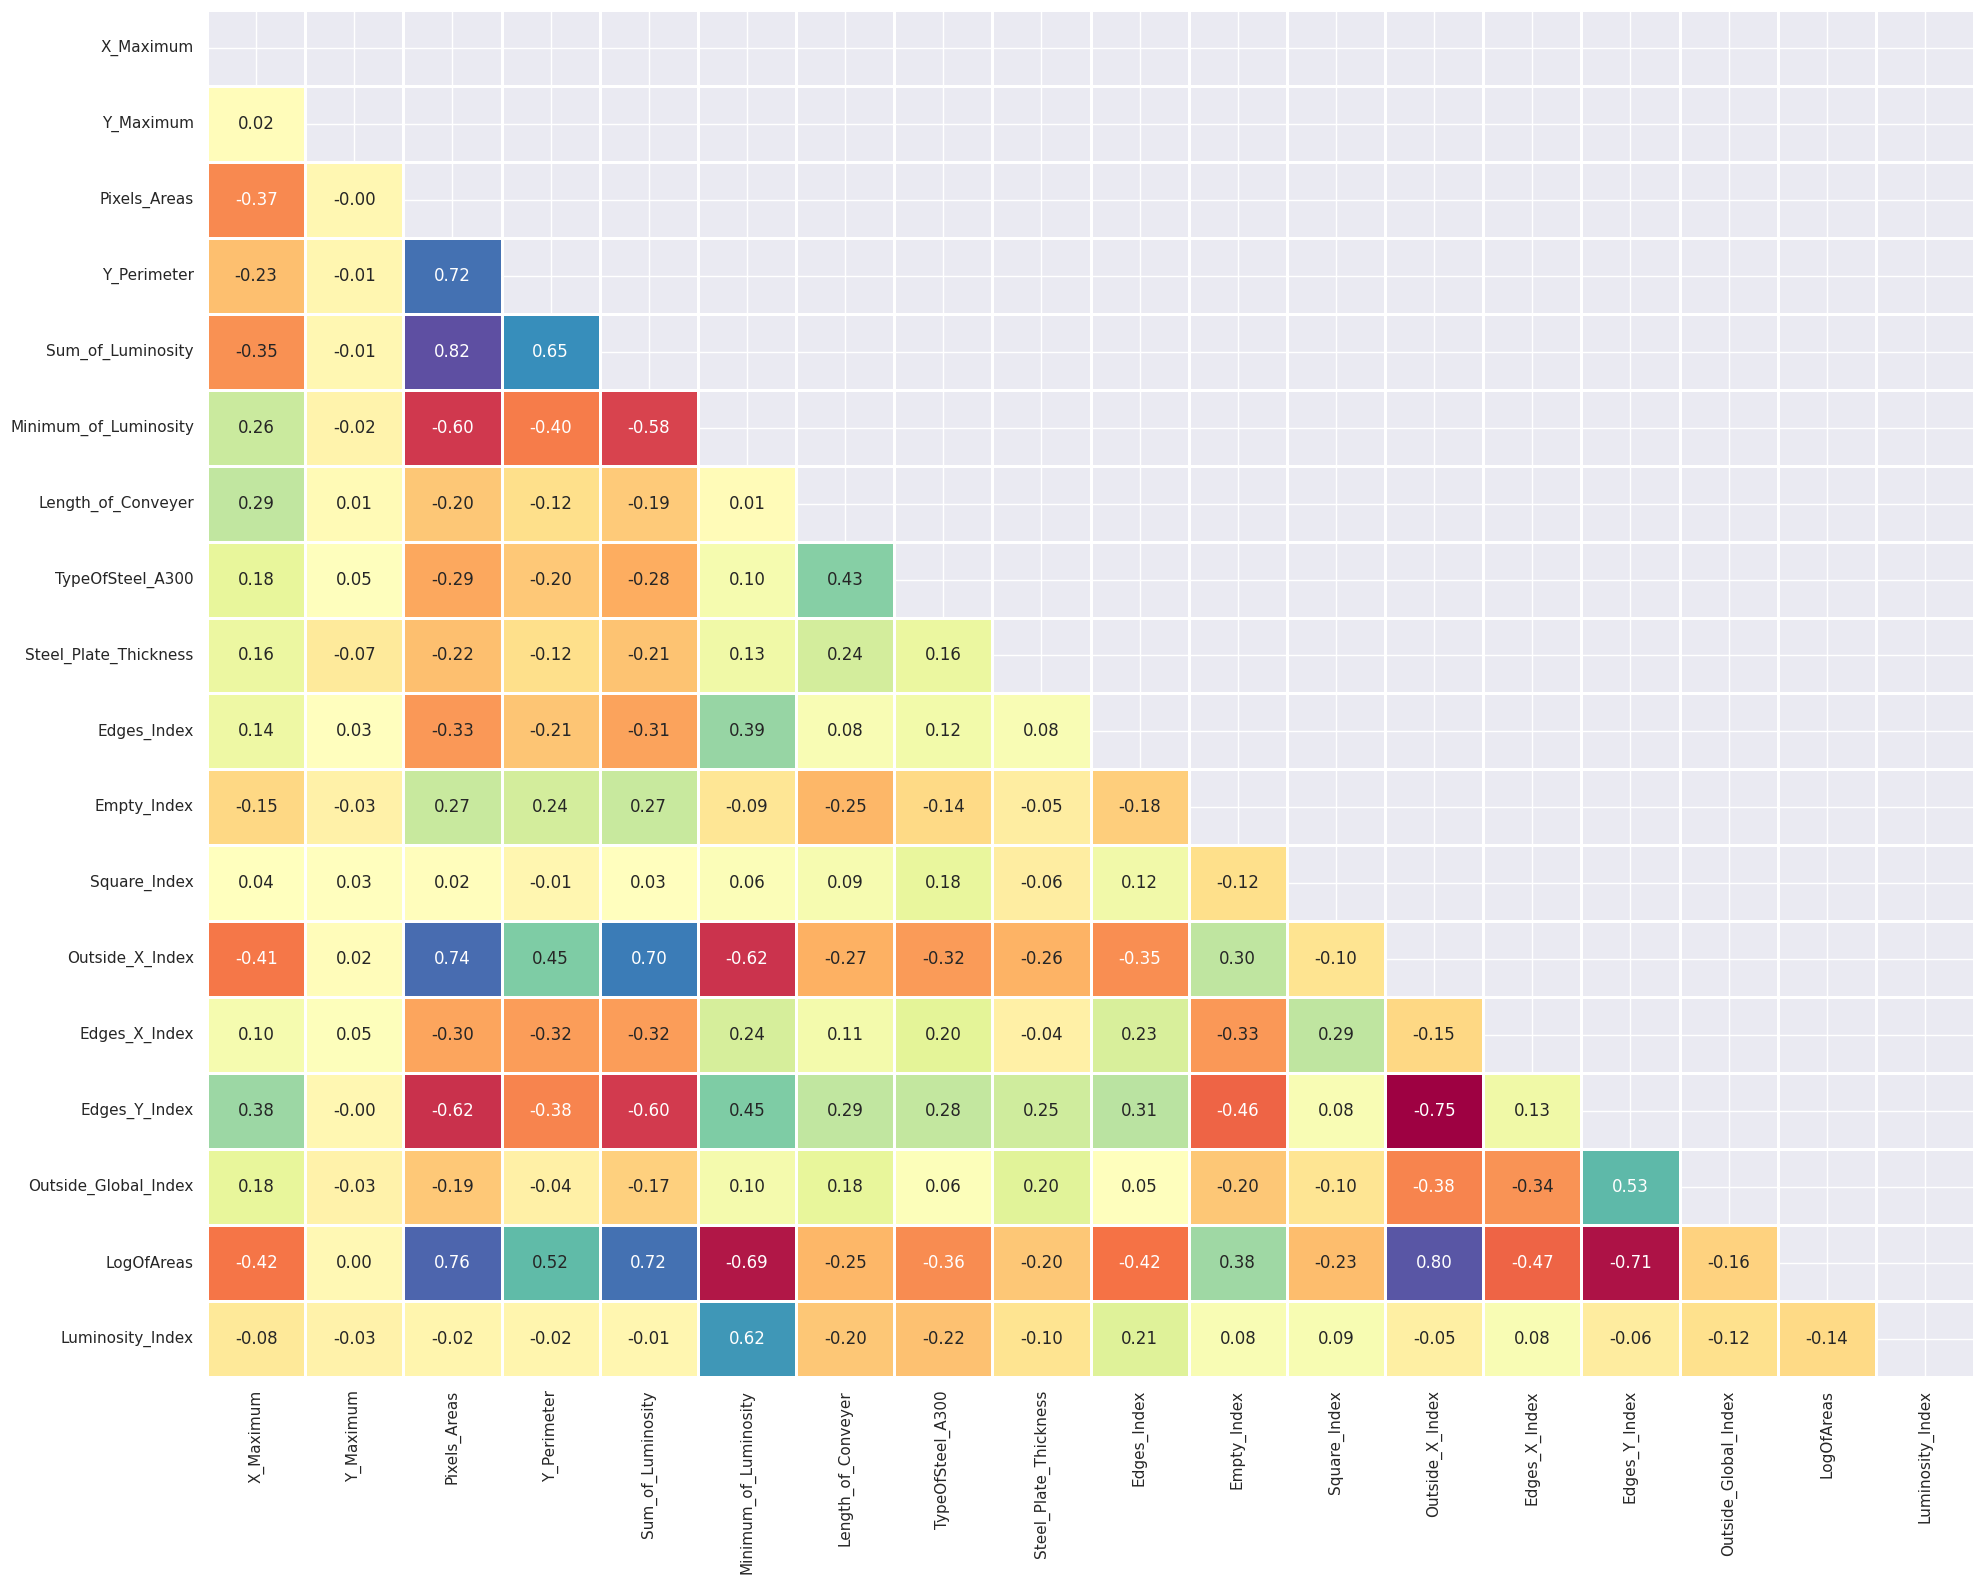

In [35]:
 # Training dataset
numeric_columns_train = X.drop(to_drop, axis=1).select_dtypes(include=np.number)
corr_train = numeric_columns_train.corr(method='pearson')
mask_train = np.triu(np.ones_like(corr_train))
sns.heatmap(corr_train, annot=True, fmt='.2f', mask=mask_train, cmap='Spectral', cbar=None, linewidth=2)
plt.tight_layout()
plt.show()

In [36]:
X = X.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)

### There is no more high correlated features! Hope it will increase my position in leaderboard!

<a id='12'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🧲 12 - Define base models with tuned hyperparameters</span>

## <span style="color: #4e6d54">Optuna for hyperparameters optimization

## <span style="background-image: url(https://www.kaggle.com/competitions/68699/images/header); color: white; font-size: 30px; padding: 5px 5px 5px 5px;">Random Forest</span>

In [37]:
# %%time
# def objective(trial):
#     model = RandomForestClassifier(
#         n_estimators=trial.suggest_int("n_estimators", 100, 1000),
#         criterion=trial.suggest_categorical("criterion", ['gini', 'entropy', 'log_loss']),
#         min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 100),
#         max_depth=trial.suggest_int("max_depth", 1, 100),
#         min_samples_split=trial.suggest_int("min_samples_split", 2, 100),
#         random_state=27
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return roc_auc_score(y_test, y_pred)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# sampler = TPESampler(seed=27)
# study = optuna.create_study(study_name="random_forest", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=50)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
# print()

"""
Number of finished trials:  50
Best trial:
  Value:  0.39744801512287337
  Params: 
    n_estimators: 447
    criterion: log_loss
    min_samples_leaf: 1
    max_depth: 89
    min_samples_split: 14

CPU times: user 45min 21s, sys: 2.39 s, total: 45min 24s
Wall time: 45min 26s
"""

""" Version 18
Number of finished trials:  50
Best trial:
  Value:  0.6821690934692143
  Params: 
    n_estimators: 784
    criterion: entropy
    min_samples_leaf: 4
    max_depth: 40
    min_samples_split: 30

CPU times: user 33min 41s, sys: 1.7 s, total: 33min 43s
Wall time: 33min 45s
"""

' Version 18\nNumber of finished trials:  50\nBest trial:\n  Value:  0.6821690934692143\n  Params: \n    n_estimators: 784\n    criterion: entropy\n    min_samples_leaf: 4\n    max_depth: 40\n    min_samples_split: 30\n\nCPU times: user 33min 41s, sys: 1.7 s, total: 33min 43s\nWall time: 33min 45s\n'

### Code will be here soon!

## <span style="background-image: url(https://www.kaggle.com/competitions/68699/images/header); color: white; font-size: 30px; padding: 5px 5px 5px 5px">XGBoost</span>

In [38]:
# %%time
# def objective(trial):
#     model = XGBClassifier(
#         max_depth=trial.suggest_int('max_depth', 1, 100),
#         learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
#         n_estimators=trial.suggest_int('n_estimators', 50, 1000),
#         min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
#         gamma=trial.suggest_float('gamma', 1e-8, 1.0, log=True),
#         subsample=trial.suggest_float('subsample', 0.01, 1.0, log=True),
#         colsample_bytree=trial.suggest_float('colsample_bytree', 0.01, 1.0, log=True),
#         reg_alpha=trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
#         reg_lambda=trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
#         eval_metric='mlogloss',
#         use_label_encoder=False,
#         random_state=27
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return roc_auc_score(y_test, y_pred)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# sampler = TPESampler(seed=27)
# study = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=100)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
# print()

"""
Number of finished trials:  50
Best trial:
  Value:  0.4763705103969754
  Params: 
    max_depth: 46
    learning_rate: 0.05107829216185988
    n_estimators: 858
    min_child_weight: 9
    gamma: 4.2722932922384926e-07
    subsample: 0.7932638392937518
    colsample_bytree: 0.9902789497298398
    reg_alpha: 6.677870866075291e-08
    reg_lambda: 0.00010282690171927627

CPU times: user 29min 55s, sys: 14.9 s, total: 30min 10s
Wall time: 30min 12s
"""

""" Version 19
Number of finished trials:  100
Best trial:
  Value:  0.7275709301009755
  Params: 
    max_depth: 13
    learning_rate: 0.038413233232634916
    n_estimators: 598
    min_child_weight: 10
    gamma: 1.499095706891034e-07
    subsample: 0.5577021452876274
    colsample_bytree: 0.7490229111079887
    reg_alpha: 0.0011850535504182432
    reg_lambda: 0.11761408489939623

CPU times: user 1h 18min 32s, sys: 44.7 s, total: 1h 19min 17s
Wall time: 20min 25s
"""

' Version 19\nNumber of finished trials:  100\nBest trial:\n  Value:  0.7275709301009755\n  Params: \n    max_depth: 13\n    learning_rate: 0.038413233232634916\n    n_estimators: 598\n    min_child_weight: 10\n    gamma: 1.499095706891034e-07\n    subsample: 0.5577021452876274\n    colsample_bytree: 0.7490229111079887\n    reg_alpha: 0.0011850535504182432\n    reg_lambda: 0.11761408489939623\n\nCPU times: user 1h 18min 32s, sys: 44.7 s, total: 1h 19min 17s\nWall time: 20min 25s\n'

### Before use Optuna with LightGBM and CatBoost we have to do something with our 7 targets and 'y' variable

In [39]:
print(y.sum(), end='\n\n\n')
print(y.sum().sum())

Pastry          1624
Z_Scratch       1340
K_Scatch        3823
Stains           640
Dirtiness        540
Bumps           5165
Other_Faults    7231
dtype: int64


20363


In [40]:
more_defects = y[y.sum(axis=1) == 2]
more_defects.shape[0]

21

In [41]:
y_reduced = y.drop(more_defects.index, axis=0)
X_reduced = X.drop(more_defects.index, axis=0)

In [42]:
print(y.shape[0], y_reduced.shape[0])
print(X.shape[0], X_reduced.shape[0])

21160 21137
21160 21137


### Actually I don't know where are 2 other observations...

## <span style="background-image: url(https://www.kaggle.com/competitions/68699/images/header); color: white; font-size: 30px; padding: 5px 5px 5px 5px">CatBoost</span>

In [43]:
# %%time
# def objective(trial):
#     model = CatBoostClassifier(
#         iterations=trial.suggest_int("iterations", 100, 1000),
#         learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
#         colsample_bylevel=trial.suggest_float("colsample_bylevel", 0.05, 1.0),
#         min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 1, 100),
#         depth=trial.suggest_int("depth", 7, 10),
#         l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
#         verbose=False,
#         random_state=27
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return roc_auc_score(y_test, y_pred)


# for target_title, target in enumerate(y.columns):
#     print(y.columns[target_title])
#     X_train, X_test, y_train, y_test = train_test_split(X, y[target], test_size=0.2, random_state=27)

#     optuna.logging.set_verbosity(optuna.logging.WARNING)

#     sampler = TPESampler(seed=27)
#     study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
#     study.optimize(objective, n_trials=20)

#     print("Number of finished trials: ", len(study.trials))
#     print("Best trial:")
#     trial = study.best_trial
#     print("  Value: ", trial.value)
#     print("  Params: ")

#     for key, value in trial.params.items():
#         print(f"    {key}: {value}")
#     print()

In [44]:
"""
Pastry
Number of finished trials:  20
Best trial:
  Value:  0.5810546520766581
  Params: 
    iterations: 692
    learning_rate: 0.09845897468677126
    colsample_bylevel: 0.42798422518900986
    min_data_in_leaf: 49
    depth: 7
    l2_leaf_reg: 90.5365823785635

Z_Scratch
Number of finished trials:  20
Best trial:
  Value:  0.8041110734300494
  Params: 
    iterations: 483
    learning_rate: 0.0425762572228653
    colsample_bylevel: 0.7486274256896956
    min_data_in_leaf: 87
    depth: 8
    l2_leaf_reg: 62.311229612297524

K_Scatch
Training has stopped (degenerate solution on iteration 97, probably too small l2-regularization, try to increase it)
Number of finished trials:  20
Best trial:
  Value:  0.9427663431425914
  Params: 
    iterations: 577
    learning_rate: 0.026083039335942488
    colsample_bylevel: 0.05706953977391527
    min_data_in_leaf: 14
    depth: 9
    l2_leaf_reg: 0.018119317452001304

Stains
Number of finished trials:  20
Best trial:
  Value:  0.8863710273466371
  Params: 
    iterations: 483
    learning_rate: 0.0425762572228653
    colsample_bylevel: 0.7486274256896956
    min_data_in_leaf: 87
    depth: 8
    l2_leaf_reg: 62.311229612297524

Dirtiness
Training has stopped (degenerate solution on iteration 202, probably too small l2-regularization, try to increase it)
Number of finished trials:  20
Best trial:
  Value:  0.5983038526774896
  Params: 
    iterations: 606
    learning_rate: 0.05045665169655117
    colsample_bylevel: 0.4597994058128304
    min_data_in_leaf: 51
    depth: 7
    l2_leaf_reg: 0.016097030633333276

Bumps
Number of finished trials:  20
Best trial:
  Value:  0.6550521329328742
  Params: 
    iterations: 775
    learning_rate: 0.05499072432060551
    colsample_bylevel: 0.22741805129784237
    min_data_in_leaf: 33
    depth: 8
    l2_leaf_reg: 0.8652273733534827

Other_Faults
Number of finished trials:  20
Best trial:
  Value:  0.6157564587617237
  Params: 
    iterations: 775
    learning_rate: 0.05499072432060551
    colsample_bylevel: 0.22741805129784237
    min_data_in_leaf: 33
    depth: 8
    l2_leaf_reg: 0.8652273733534827

CPU times: user 58min 33s, sys: 11min 25s, total: 1h 9min 59s
Wall time: 21min 13s
"""

'\nPastry\nNumber of finished trials:  20\nBest trial:\n  Value:  0.5810546520766581\n  Params: \n    iterations: 692\n    learning_rate: 0.09845897468677126\n    colsample_bylevel: 0.42798422518900986\n    min_data_in_leaf: 49\n    depth: 7\n    l2_leaf_reg: 90.5365823785635\n\nZ_Scratch\nNumber of finished trials:  20\nBest trial:\n  Value:  0.8041110734300494\n  Params: \n    iterations: 483\n    learning_rate: 0.0425762572228653\n    colsample_bylevel: 0.7486274256896956\n    min_data_in_leaf: 87\n    depth: 8\n    l2_leaf_reg: 62.311229612297524\n\nK_Scatch\nTraining has stopped (degenerate solution on iteration 97, probably too small l2-regularization, try to increase it)\nNumber of finished trials:  20\nBest trial:\n  Value:  0.9427663431425914\n  Params: \n    iterations: 577\n    learning_rate: 0.026083039335942488\n    colsample_bylevel: 0.05706953977391527\n    min_data_in_leaf: 14\n    depth: 9\n    l2_leaf_reg: 0.018119317452001304\n\nStains\nNumber of finished trials:  20

## <span style="background-image: url(https://www.kaggle.com/competitions/68699/images/header); color: white; font-size: 30px; padding: 5px 5px 5px 5px">LightGBM</span>

In [45]:
# %%time
# def objective(trial):
#     model = LGBMClassifier(
#         n_estimators=trial.suggest_int("n_estimators", 100, 1000),
#         max_depth=trial.suggest_int("max_depth", 1, 100),
#         learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
#         verbosity=-1,
#         boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
#         num_leaves=trial.suggest_int('num_leaves', 2, 256),
#         min_child_samples=trial.suggest_int('min_child_samples', 5, 100),
#         random_state=27
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return roc_auc_score(y_test, y_pred)


# for target_title, target in enumerate(y.columns):
#     print(y.columns[target_title])
#     X_train, X_test, y_train, y_test = train_test_split(X, y[target], test_size=0.2, random_state=27)

#     optuna.logging.set_verbosity(optuna.logging.WARNING)

#     sampler = TPESampler(seed=27)
#     study = optuna.create_study(study_name="lgbm", direction="maximize", sampler=sampler)
#     study.optimize(objective, n_trials=20)

#     print("Number of finished trials: ", len(study.trials))
#     print("Best trial:")
#     trial = study.best_trial
#     print("  Value: ", trial.value)
#     print("  Params: ")
#     for key, value in trial.params.items():
#         print(f"    {key}: {value}")
#     print()
    
"""
Pastry
Number of finished trials:  20
Best trial:
  Value:  0.5796414968865244
  Params: 
    n_estimators: 637
    max_depth: 27
    learning_rate: 0.09625466652345983
    boosting_type: dart
    num_leaves: 167
    min_child_samples: 92

Z_Scratch
Number of finished trials:  20
Best trial:
  Value:  0.8242995721956714
  Params: 
    n_estimators: 728
    max_depth: 59
    learning_rate: 0.015462067076571285
    boosting_type: dart
    num_leaves: 146
    min_child_samples: 61

K_Scatch
Number of finished trials:  20
Best trial:
  Value:  0.9431972538004484
  Params: 
    n_estimators: 288
    max_depth: 75
    learning_rate: 0.02119759734120936
    boosting_type: gbdt
    num_leaves: 193
    min_child_samples: 88
"""

'\nPastry\nNumber of finished trials:  20\nBest trial:\n  Value:  0.5796414968865244\n  Params: \n    n_estimators: 637\n    max_depth: 27\n    learning_rate: 0.09625466652345983\n    boosting_type: dart\n    num_leaves: 167\n    min_child_samples: 92\n\nZ_Scratch\nNumber of finished trials:  20\nBest trial:\n  Value:  0.8242995721956714\n  Params: \n    n_estimators: 728\n    max_depth: 59\n    learning_rate: 0.015462067076571285\n    boosting_type: dart\n    num_leaves: 146\n    min_child_samples: 61\n\nK_Scatch\nNumber of finished trials:  20\nBest trial:\n  Value:  0.9431972538004484\n  Params: \n    n_estimators: 288\n    max_depth: 75\n    learning_rate: 0.02119759734120936\n    boosting_type: gbdt\n    num_leaves: 193\n    min_child_samples: 88\n'

In [46]:
base_models = [
    ('catboost', CatBoostClassifier(
        iterations=577,
        learning_rate=0.026083039335942488,
        colsample_bylevel=0.05706953977391527,
        min_data_in_leaf=14,
        depth=9,
        l2_leaf_reg=0.018119317452001304,
        random_state=27,
    )),
    ('random_forest', RandomForestClassifier(
        n_estimators=784,
        criterion='entropy',
        min_samples_leaf=4,
        max_depth=40,
        min_samples_split=30,
        random_state=27
    )),
    ('lightgmb', LGBMClassifier(
        n_estimators=288,
        max_depth=75,
        learning_rate=0.02119759734120936,
        boosting_type='gbdt',
        num_leaves=193,
        min_child_samples=88,
        random_state=27
    )),
    ('xgboost', XGBClassifier(
        max_depth=13,
        learning_rate=0.038413233232634916,
        n_estimators=598,
        min_child_weight=10,
        gamma=1.499095706891034e-07,
        subsample=0.5577021452876274,
        colsample_bytree=0.7490229111079887,
        reg_alpha=0.0011850535504182432,
        reg_lambda=0.11761408489939623,
    )),  
]

<a id='13'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🪚 13 - Defining the meta-model with tuned hyperparameters</span>

In [47]:
meta_model = XGBClassifier(
    grow_policy='lossguide',
    n_estimators=851, 
    learning_rate=0.02081738404575395, 
    gamma=0.23579231329205605, 
    subsample=0.4563941856790292, 
    colsample_bytree=0.789163206495759,
    max_depth=3, 
    min_child_weight=2, 
    reg_lambda=2.5747670449183116e-05, 
    reg_alpha=1.2036335504972275,
    random_state=27
)

<a id='14'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🪜 14 - Creating and fitting the stacking model

In [48]:
%%time
target_features = ["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]
predictions_proba = pd.DataFrame()

models = []

for target_column in target_features:
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
    stacking_model.fit(X, y[target_column])
    
    models.append(stacking_model)
    
    predictions_proba[target_column] = stacking_model.predict_proba(test)[:, 1]

0:	learn: 0.6623992	total: 57.9ms	remaining: 33.3s
1:	learn: 0.6356707	total: 67.7ms	remaining: 19.5s
2:	learn: 0.6123074	total: 71.5ms	remaining: 13.7s
3:	learn: 0.5892491	total: 74.7ms	remaining: 10.7s
4:	learn: 0.5635774	total: 78.9ms	remaining: 9.03s
5:	learn: 0.5373315	total: 88.2ms	remaining: 8.39s
6:	learn: 0.5194477	total: 91.9ms	remaining: 7.48s
7:	learn: 0.4956311	total: 102ms	remaining: 7.26s
8:	learn: 0.4723264	total: 107ms	remaining: 6.74s
9:	learn: 0.4590266	total: 110ms	remaining: 6.21s
10:	learn: 0.4452979	total: 114ms	remaining: 5.85s
11:	learn: 0.4337349	total: 117ms	remaining: 5.49s
12:	learn: 0.4190471	total: 124ms	remaining: 5.37s
13:	learn: 0.4031291	total: 130ms	remaining: 5.21s
14:	learn: 0.3940649	total: 133ms	remaining: 4.97s
15:	learn: 0.3855532	total: 136ms	remaining: 4.76s
16:	learn: 0.3769385	total: 139ms	remaining: 4.59s
17:	learn: 0.3695416	total: 142ms	remaining: 4.42s
18:	learn: 0.3625058	total: 145ms	remaining: 4.27s
19:	learn: 0.3560289	total: 148ms	

<a id='15'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🛻 15 - Predict the validation set and calculate ROC AUC score</span>

![](https://media.springernature.com/m685/springer-static/image/art%3A10.1007%2Fs10845-020-01670-2/MediaObjects/10845_2020_1670_Fig4_HTML.jpg)

<a id='16'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🏭 16 - Predict the test data</span>

In [49]:
y_pred_test = stacking_model.predict(test)
y_pred_test[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

<a id='17'></a>
# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">🏗️ 17 - Build DataFrame and make submission</span>

In [50]:
submission = predictions_proba
submission.insert(0, 'id', submission_id)

submission.to_csv('Kapturov_S4E3_submission.csv', index=False)
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.526617,0.000261,0.001454,0.000145,0.018015,0.207833,0.418164
1,19220,0.255419,0.005305,0.005003,0.000145,0.132319,0.133273,0.322386
2,19221,0.000443,0.034248,0.055192,0.000145,0.001780,0.388250,0.516902
3,19222,0.139523,0.000281,0.000248,0.000145,0.002308,0.398369,0.481729
4,19223,0.001144,0.000287,0.000248,0.000189,0.002681,0.694584,0.445181


# <span style="color: #3cb371; border-bottom: 6px solid #4e6d54;background-color: #eef3ef;">😀 Hope You are feeling great!</span>